# Project: Indian Agriculture Crop Production

<center><img src = "https://images.unsplash.com/photo-1520052203542-d3095f1b6cf0?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NXx8aW5kaWFuJTIwZmFybWVyfGVufDB8fDB8fHww&auto=format&fit=crop&w=600&q=60"/></center>

# Objective of the Proposed Research:

The main goal of this research project is to examine the data, on crop production in districts of India from 1997 to 2021. The key person involved in this project is the Minister of Agriculture and Farmers Welfare in India, who plays a role, in creating policies and making important choices that affect the lives of countless farmers throughout the nation.

By studying this dataset our research aims to provide insights to the Minister enabling them to make well informed decisions based on data. This project will help the Minister gain an understanding of agriculture in districts of India identify patterns and make informed policy choices. For example by analyzing crop production trends over time it will be possible to allocate resources, subsidies and develop infrastructure in regions that require support. Additionally by assessing differences in crop production the Minister can design policies that promote agriculture practices and encourage crop diversification in specific areas.

Furthermore this research project plays a role in enhancing efficiency and productivity, within Indias agricultural sector. By providing recommendations based on evidence it assists the Minister in formulating policies that address challenges like optimizing crop yields adapting to climate change impacts and ensuring distribution of resources. Basically the project gives the Minister of Agriculture and Farmers Welfare the ability to make decisions that can have an effect, on farmers lives enhance food security and contribute to the sustainable development of Indias agriculture sector.

# Data Exploration

In [ ]:
#import Load necessary libraries
library(dplyr)
library(ggplot2)
library(scales)
install.packages("ggplot2")
install.packages("corrplot")

In [ ]:
# Load the dataset
df <- read.csv('/content/India Agriculture Crop Production.csv')

# Display the first few rows of the dataset
head(df)

,State,District,Crop,Year,Season,Area,Area.Units,Production,Production.Units,Yield
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,Hectare,2061,Tonnes,1.643541
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,Hectare,2083,Tonnes,1.655803
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,Hectare,1525,Tonnes,1.209358
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,Hectare,5239,Tonnes,1.690000
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,Hectare,5267,Tonnes,1.696296
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,Hectare,5182,Tonnes,1.661963


In [ ]:
# Get summary statistics for numerical columns
summary(df)

    State             District             Crop               Year          
 Length:345407      Length:345407      Length:345407      Length:345407     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    Season               Area          Area.Units          Production       
 Length:345407      Min.   :      0   Length:345407      Min.   :0.000e+00  
 Class :character   1st Qu.:     74   Class :character   1st Qu.:8.700e+01  
 Mode  :character   Median :    532   Mode  :character   Median :7.170e+02  
                    Mean   :  11670                      Mean   :9.584e+05  

In [ ]:
# Display the structure of the DataFrame 'df'
str(df)

'data.frame':	345407 obs. of  10 variables:
 $ State           : chr  "Andaman and Nicobar Islands" "Andaman and Nicobar Islands" "Andaman and Nicobar Islands" "Andaman and Nicobar Islands" ...
 $ District        : chr  "NICOBARS" "NICOBARS" "NICOBARS" "NORTH AND MIDDLE ANDAMAN" ...
 $ Crop            : chr  "Arecanut" "Arecanut" "Arecanut" "Arecanut" ...
 $ Year            : chr  "2001-02" "2002-03" "2003-04" "2001-02" ...
 $ Season          : chr  "Kharif" "Whole Year" "Whole Year" "Kharif" ...
 $ Area            : num  1254 1258 1261 3100 3105 ...
 $ Area.Units      : chr  "Hectare" "Hectare" "Hectare" "Hectare" ...
 $ Production      : num  2061 2083 1525 5239 5267 ...
 $ Production.Units: chr  "Tonnes" "Tonnes" "Tonnes" "Tonnes" ...
 $ Yield           : num  1.64 1.66 1.21 1.69 1.7 ...


In [ ]:
# List unique values in the 'Crop' column
unique_crops <- unique(df$Crop)
print("Unique Crops:")
print(unique_crops)

[1] "Unique Crops:"
 [1] "Arecanut"              "Banana"                "Black pepper"         
 [4] "Cashewnut"             "Coconut"               "Dry chillies"         
 [7] "Ginger"                "Other Kharif pulses"   "other oilseeds"       
[10] "Rice"                  "Sugarcane"             "Sweet potato"         
[13] "Arhar/Tur"             "Bajra"                 "Castor seed"          
[16] "Coriander"             "Cotton(lint)"          "Gram"                 
[19] "Groundnut"             "Horse-gram"            "Jowar"                
[22] "Linseed"               "Maize"                 "Mesta"                
[25] "Moong(Green Gram)"     "Niger seed"            "Onion"                
[28] "Other Rabi pulses"     "Potato"                "Ragi"                 
[31] "Rapeseed &Mustard"     "Safflower"             "Sesamum"              
[34] "Small millets"         "Soyabean"              "Sunflower"            
[37] "Tapioca"               "Tobacco"               "Tu

In [ ]:
# List unique values in the 'State' column
unique_states <- unique(df$State)
print(unique_states)

 [1] "Andaman and Nicobar Islands" "Andhra Pradesh"             
 [3] "Arunachal Pradesh"           "Assam"                      
 [5] "Bihar"                       "Chandigarh"                 
 [7] "Chhattisgarh"                "Dadra and Nagar Haveli"     
 [9] "Daman and Diu"               "Delhi"                      
[11] "Goa"                         "Gujarat"                    
[13] "Haryana"                     "Himachal Pradesh"           
[15] "Jammu and Kashmir"           "Jharkhand"                  
[17] "Karnataka"                   "Kerala"                     
[19] "Madhya Pradesh"              "Maharashtra"                
[21] "Manipur"                     "Meghalaya"                  
[23] "Mizoram"                     "Nagaland"                   
[25] "Odisha"                      "Puducherry"                 
[27] "Punjab"                      "Rajasthan"                  
[29] "Sikkim"                      "Tamil Nadu"                 
[31] "Tripura"           

In [ ]:
# Create a frequency table of unique values in the 'Season' column
table(df$Season)


    Autumn     Kharif        nan       Rabi     Summer Whole Year     Winter 
      6989     138400          1     100977      22101      68689       8250 

As we can see, most of the crops are cultivated during the 'Kharif' season. Consequently, stakeholders can focus more on this season than on others.

In [ ]:
# Calculate the total production by crop
crop_production <- aggregate(Production ~ Crop, data = df, sum)

# Order the 'crop_production' dataframe by production in descending order
crop_production <- crop_production[order(-crop_production$Production), ]

# Select the top 10 crops with the highest production
top_10_crops <- head(crop_production, 10)

# Print the top 10 crops with the highest production
print(top_10_crops)

           Crop   Production
10      Coconut 310804772578
49    Sugarcane   7239868490
43         Rice   2236428172
56        Wheat   2007360348
40       Potato    632315652
12 Cotton(lint)    483907993
26        Maize    443991183
23         Jute    230423820
4        Banana    227197787
48     Soyabean    211796462


Coconut production stands out as the clear leader in crop production, contributing a staggering 310.8 billion units

In [ ]:
# Calculate the total production by state
state_production <- aggregate(Production ~ State, data = df, sum)

#  state_production dataframe by production in descending order
state_production <- state_production[order(-state_production$Production), ]

# top 10 states with the highest production
top_10_states <- head(state_production, 10)

#  top 10 states in descending order of production
print(top_10_states)

                         State   Production
18                      Kerala 129700649856
31                  Tamil Nadu  78051759361
17                   Karnataka  63772797345
2               Andhra Pradesh  26076218605
36                 West Bengal   8941179120
34               Uttar Pradesh   4442585306
4                        Assam   3637714928
11                         Goa   2194003548
1  Andaman and Nicobar Islands   2053354805
21                 Maharashtra   1878564918


This indicates that the southern region plays a role, in the countrys productivity. Because, Kerala and Tamil Nadu have a presence in Indias production sector making a contribution to the overall output.

In [ ]:
# Convert 'Year' to Date format with the first day of each month
df$Date <- as.Date(paste(df$Year, "-01-01", sep = ""), format = "%Y-%m-%d")
head(df)

,State,District,Crop,Year,Season,Area,Area.Units,Production,Production.Units,Yield,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<date>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,Hectare,2061,Tonnes,1.643541,2001-02-01
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,Hectare,2083,Tonnes,1.655803,2002-03-01
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,Hectare,1525,Tonnes,1.209358,2003-04-01
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,Hectare,5239,Tonnes,1.690000,2001-02-01
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,Hectare,5267,Tonnes,1.696296,2002-03-01
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,Hectare,5182,Tonnes,1.661963,2003-04-01


We converted the mm/yyyy date format to dd/mm/yyyy for greater accuracy and efficiency.

Warning message:
“Removed 33 rows containing missing values (`geom_line()`).”


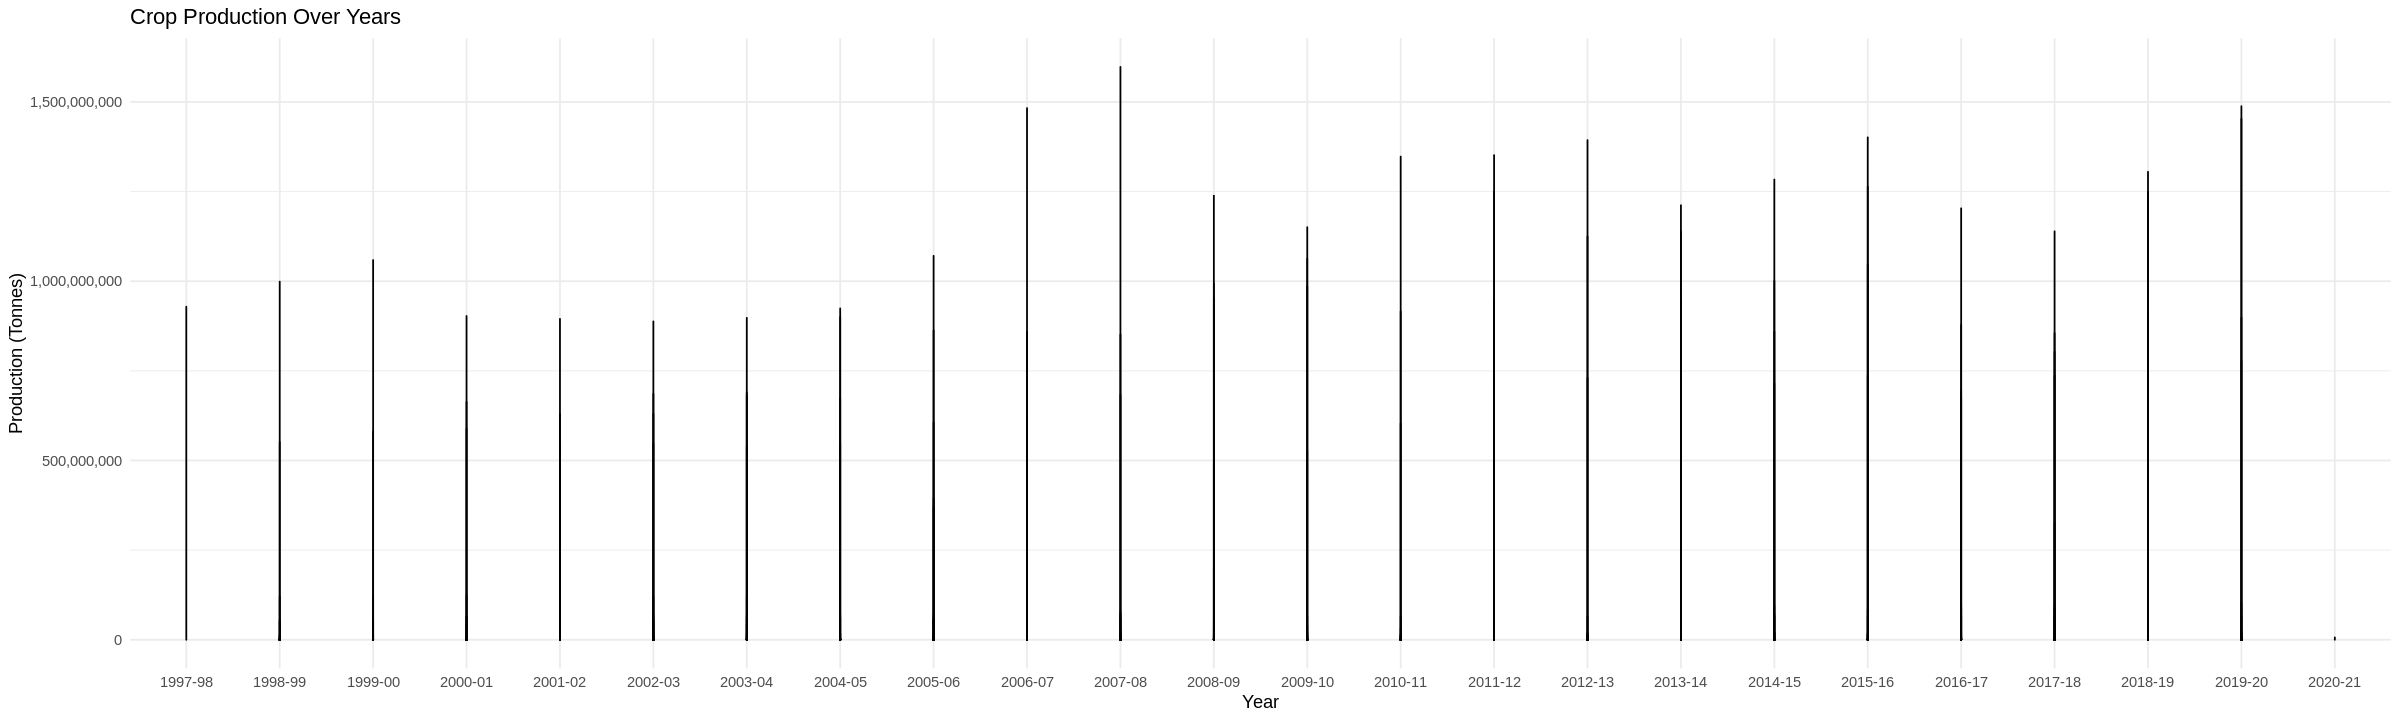

In [ ]:
# size of the plots
options(repr.plot.width = 20, repr.plot.height = 6)

# Create a line graph for Year vs. Production with custom y-axis labels
ggplot(df, aes(x = Year, y = Production)) +
  geom_line() +
  labs(title = "Crop Production Over Years",
       x = "Year",
       y = "Production (Tonnes)") +
  theme_minimal() +
  scale_y_continuous(labels = scales::comma)

As we can see, in the year 2007-08, production was at its highest, reaching around 1,500,000,000.

# Data Cleaning

In [ ]:
# Check for missing data in columns
missing_data <- colSums(is.na(df))
print(missing_data)

           State         District             Crop             Year 
               0                0                0                0 
          Season             Area       Area.Units       Production 
               0               33                0             4993 
Production.Units            Yield             Date 
               0               33           170578 


In [ ]:
# Remove rows with empty values in the 'Crop' and 'Area' columns
df_cleaned <- df[!(df$Crop == "" | is.na(df$Crop) | df$Area == "" | is.na(df$Area)), ]

head(df_cleaned)

,State,District,Crop,Year,Season,Area,Area.Units,Production,Production.Units,Yield,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<date>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,Hectare,2061,Tonnes,1.643541,2001-02-01
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,Hectare,2083,Tonnes,1.655803,2002-03-01
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,Hectare,1525,Tonnes,1.209358,2003-04-01
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,Hectare,5239,Tonnes,1.690000,2001-02-01
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,Hectare,5267,Tonnes,1.696296,2002-03-01
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,Hectare,5182,Tonnes,1.661963,2003-04-01


In [ ]:
# Check the dimensions of the cleaned dataset
dim(df_cleaned)

[1] 345374     11

In [ ]:
#remove null and 0 values in yield
df_cleaned <- df_cleaned[!(df_cleaned$Yield == 0 | is.na(df_cleaned$Yield)), ]
head(df_cleaned,10)

,State,District,Crop,Year,Season,Area,Area.Units,Production,Production.Units,Yield,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<date>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,Hectare,2061,Tonnes,1.643541,2001-02-01
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,Hectare,2083,Tonnes,1.655803,2002-03-01
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,Hectare,1525,Tonnes,1.209358,2003-04-01
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,Hectare,5239,Tonnes,1.690000,2001-02-01
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,Hectare,5267,Tonnes,1.696296,2002-03-01
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,Hectare,5182,Tonnes,1.661963,2003-04-01
7,Andaman and Nicobar Islands,NICOBARS,Banana,2002-03,Whole Year,213,Hectare,1278,Tonnes,6.000000,2002-03-01
8,Andaman and Nicobar Islands,NICOBARS,Banana,2003-04,Whole Year,266,Hectare,1763,Tonnes,6.627820,2003-04-01
9,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2002-03,Whole Year,1524,Hectare,10882,Tonnes,7.140420,2002-03-01


In [ ]:
# Remove the 'Area Units' column
df_cleaned <- df_cleaned[, !(names(df_cleaned) == "Area.Units")]

# Check the structure of the cleaned dataset
str(df_cleaned)

'data.frame':	339390 obs. of  10 variables:
 $ State           : chr  "Andaman and Nicobar Islands" "Andaman and Nicobar Islands" "Andaman and Nicobar Islands" "Andaman and Nicobar Islands" ...
 $ District        : chr  "NICOBARS" "NICOBARS" "NICOBARS" "NORTH AND MIDDLE ANDAMAN" ...
 $ Crop            : chr  "Arecanut" "Arecanut" "Arecanut" "Arecanut" ...
 $ Year            : chr  "2001-02" "2002-03" "2003-04" "2001-02" ...
 $ Season          : chr  "Kharif" "Whole Year" "Whole Year" "Kharif" ...
 $ Area            : num  1254 1258 1261 3100 3105 ...
 $ Production      : num  2061 2083 1525 5239 5267 ...
 $ Production.Units: chr  "Tonnes" "Tonnes" "Tonnes" "Tonnes" ...
 $ Yield           : num  1.64 1.66 1.21 1.69 1.7 ...
 $ Date            : Date, format: "2001-02-01" "2002-03-01" ...


* Far we've made sure to eliminate any data, in the dataset to improve accuracy. Lastly we decided to remove the 'Area.Units' column since it only had one value, which happened to be 'Hector'.

# Adaptation

In [ ]:
# Calculate Yield per Hectare
df_cleaned$Yield_per_Hectare <- df_cleaned$Yield / df_cleaned$Area
head(df_cleaned)

,State,District,Crop,Year,Season,Area,Production,Production.Units,Yield,Date,Yield_per_Hectare
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<dbl>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,2061,Tonnes,1.643541,2001-02-01,0.0013106385
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,2083,Tonnes,1.655803,2002-03-01,0.0013162185
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,1525,Tonnes,1.209358,2003-04-01,0.0009590465
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,5239,Tonnes,1.690000,2001-02-01,0.0005451613
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,5267,Tonnes,1.696296,2002-03-01,0.0005463112
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,5182,Tonnes,1.661963,2003-04-01,0.0005330221


Calculate the yield per hectare for each crop by dividing 'Yield' by 'Area.' This column will provide information on crop productivity in terms of yield per unit area

In [ ]:
# Create a new column for Production per Area
df_cleaned$Production_per_Area <- df_cleaned$Production / df_cleaned$Area
head(df_cleaned)

,State,District,Crop,Year,Season,Area,Production,Production.Units,Yield,Date,Yield_per_Hectare,Production_per_Area
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<dbl>,<dbl>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,2061,Tonnes,1.643541,2001-02-01,0.0013106385,1.643541
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,2083,Tonnes,1.655803,2002-03-01,0.0013162185,1.655803
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,1525,Tonnes,1.209358,2003-04-01,0.0009590465,1.209358
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,5239,Tonnes,1.690000,2001-02-01,0.0005451613,1.690000
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,5267,Tonnes,1.696296,2002-03-01,0.0005463112,1.696296
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,5182,Tonnes,1.661963,2003-04-01,0.0005330221,1.661963


This calculation represents the amount of crop production achieved per unit of land area used for cultivation

In [ ]:
# Define a function to categorize crops
categorize_crop <- function(crop_name) {
  # Define categories based on your criteria
  if (grepl("Rice|Wheat|Barley", crop_name)) {
    return("Cereals")
  } else if (grepl("Arhar/Tur|Gram|Lentil", crop_name)) {
    return("Pulses")
  } else if (grepl("Soyabean|Groundnut|Sunflower", crop_name)) {
    return("Oilseeds")
  } else if (grepl("Banana|Mango|Apple|Arecanut|Black pepper|Coconut|Cashewnut|Coconut|Dry chillies", crop_name)) {
    return("Fruits")
  } else {
    return("Other")
  }
}

# Create a new column 'Crop_Category'
df_cleaned$Crop_Category <- sapply(df_cleaned$Crop, categorize_crop)
head(df_cleaned)

,State,District,Crop,Year,Season,Area,Production,Production.Units,Yield,Date,Yield_per_Hectare,Production_per_Area,Crop_Category
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<chr>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,2061,Tonnes,1.643541,2001-02-01,0.0013106385,1.643541,Fruits
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,2083,Tonnes,1.655803,2002-03-01,0.0013162185,1.655803,Fruits
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,1525,Tonnes,1.209358,2003-04-01,0.0009590465,1.209358,Fruits
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,5239,Tonnes,1.690000,2001-02-01,0.0005451613,1.690000,Fruits
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,5267,Tonnes,1.696296,2002-03-01,0.0005463112,1.696296,Fruits
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,5182,Tonnes,1.661963,2003-04-01,0.0005330221,1.661963,Fruits


The code is useful because it categorizes crops into broader groups, simplifying analysis, enabling comparative assessments.

In [ ]:
# Impute missing values with the mean
df_cleaned$Production[is.na(df_cleaned$Production)] <- mean(df_cleaned$Production, na.rm = TRUE)
head(df_cleaned)

,State,District,Crop,Year,Season,Area,Production,Production.Units,Yield,Date,Yield_per_Hectare,Production_per_Area,Crop_Category
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<chr>
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,2061,Tonnes,1.643541,2001-02-01,0.0013106385,1.643541,Fruits
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,2083,Tonnes,1.655803,2002-03-01,0.0013162185,1.655803,Fruits
3,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,1525,Tonnes,1.209358,2003-04-01,0.0009590465,1.209358,Fruits
4,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100,5239,Tonnes,1.690000,2001-02-01,0.0005451613,1.690000,Fruits
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105,5267,Tonnes,1.696296,2002-03-01,0.0005463112,1.696296,Fruits
6,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118,5182,Tonnes,1.661963,2003-04-01,0.0005330221,1.661963,Fruits


In [ ]:
# Add the new columns
df_cleaned <- df_cleaned %>%
  group_by(State, Year) %>%
  mutate(
    Total_Production_Tonnes = sum(Production),
    Total_Area_Hectares = sum(Area),
    Avg_Yield_per_Hectare = Total_Production_Tonnes / Total_Area_Hectares
  ) %>%
  ungroup()

# View the updated dataframe
head(df_cleaned,3)

State,District,Crop,Year,Season,Area,Production,Production.Units,Yield,Date,Yield_per_Hectare,Production_per_Area,Crop_Category,Total_Production_Tonnes,Total_Area_Hectares,Avg_Yield_per_Hectare
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254,2061,Tonnes,1.643541,2001-02-01,0.0013106385,1.643541,Fruits,89718700,41163.0,2179.596
Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258,2083,Tonnes,1.655803,2002-03-01,0.0013162185,1.655803,Fruits,94387138,45231.4,2086.761
Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261,1525,Tonnes,1.209358,2003-04-01,0.0009590465,1.209358,Fruits,95296455,44799.4,2127.181


We did not have many numerical values in the dataset, so we created three new columns.

# Visualization

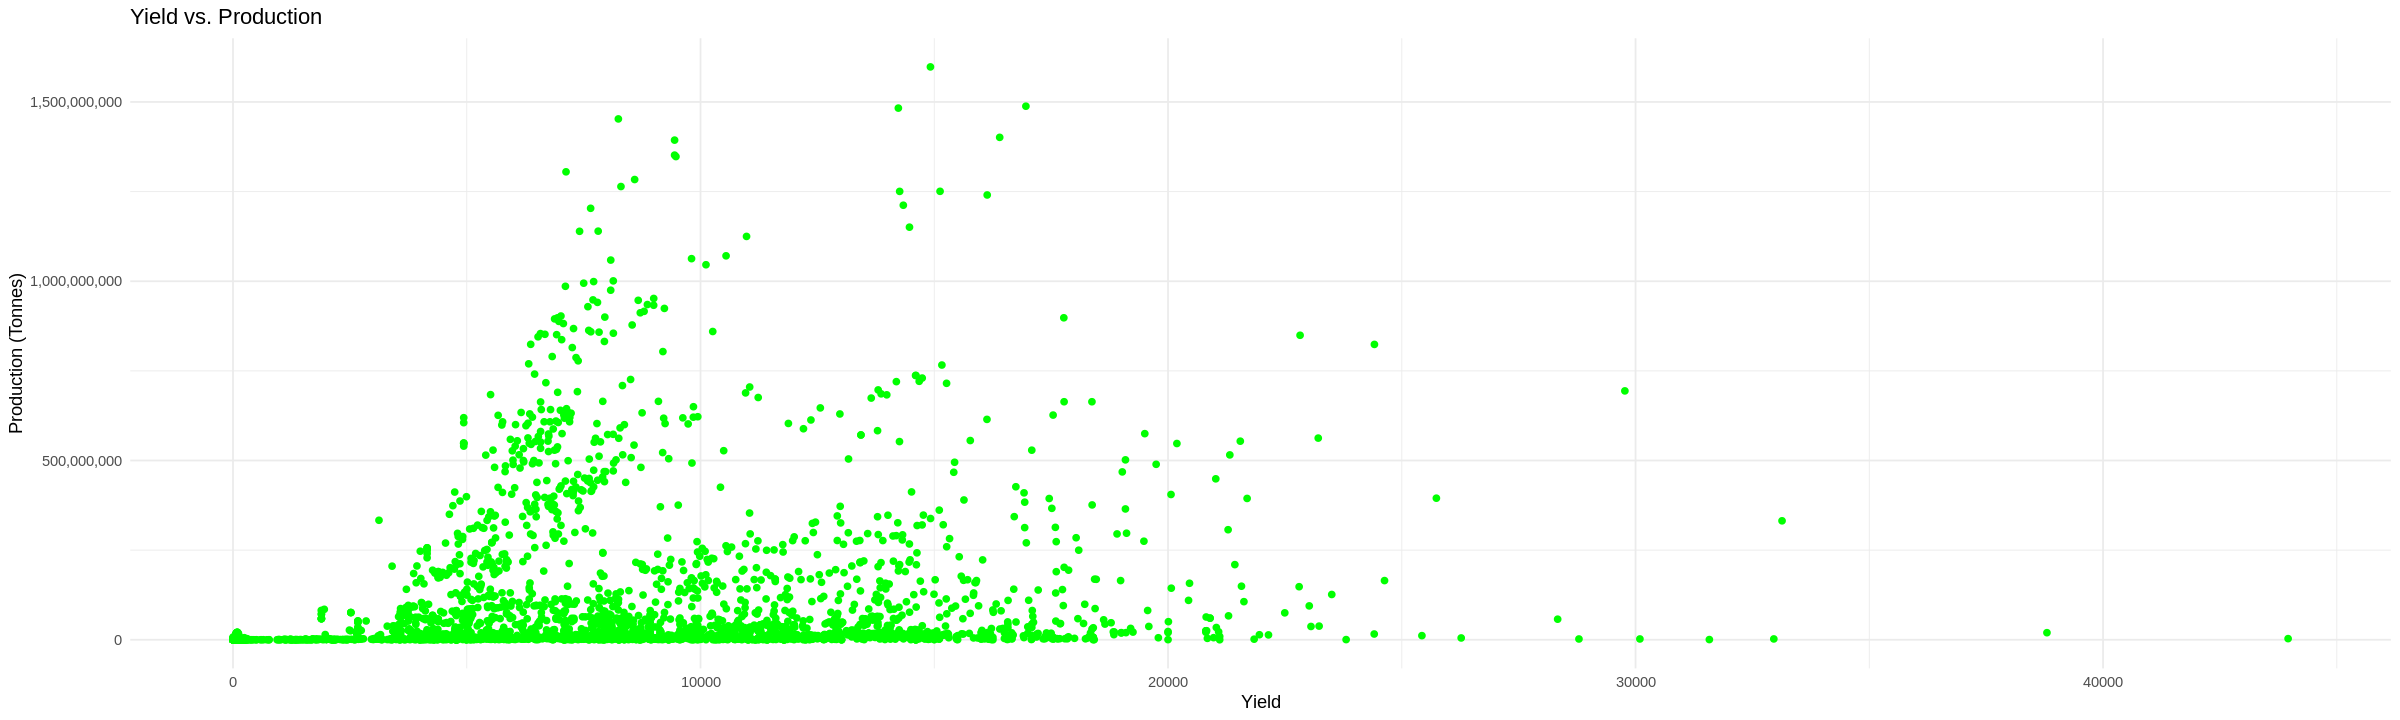

In [ ]:
# Visualization 1: Yield vs. Production
ggplot(df_cleaned, aes(x = Yield, y = Production)) +
  geom_point(color = "green") +
  labs(title = "Yield vs. Production",
       x = "Yield",
       y = "Production (Tonnes)") +
  theme_minimal() + scale_y_continuous(labels = comma)

 These statistics provide an overview of the central tendency and spread of each dataset.

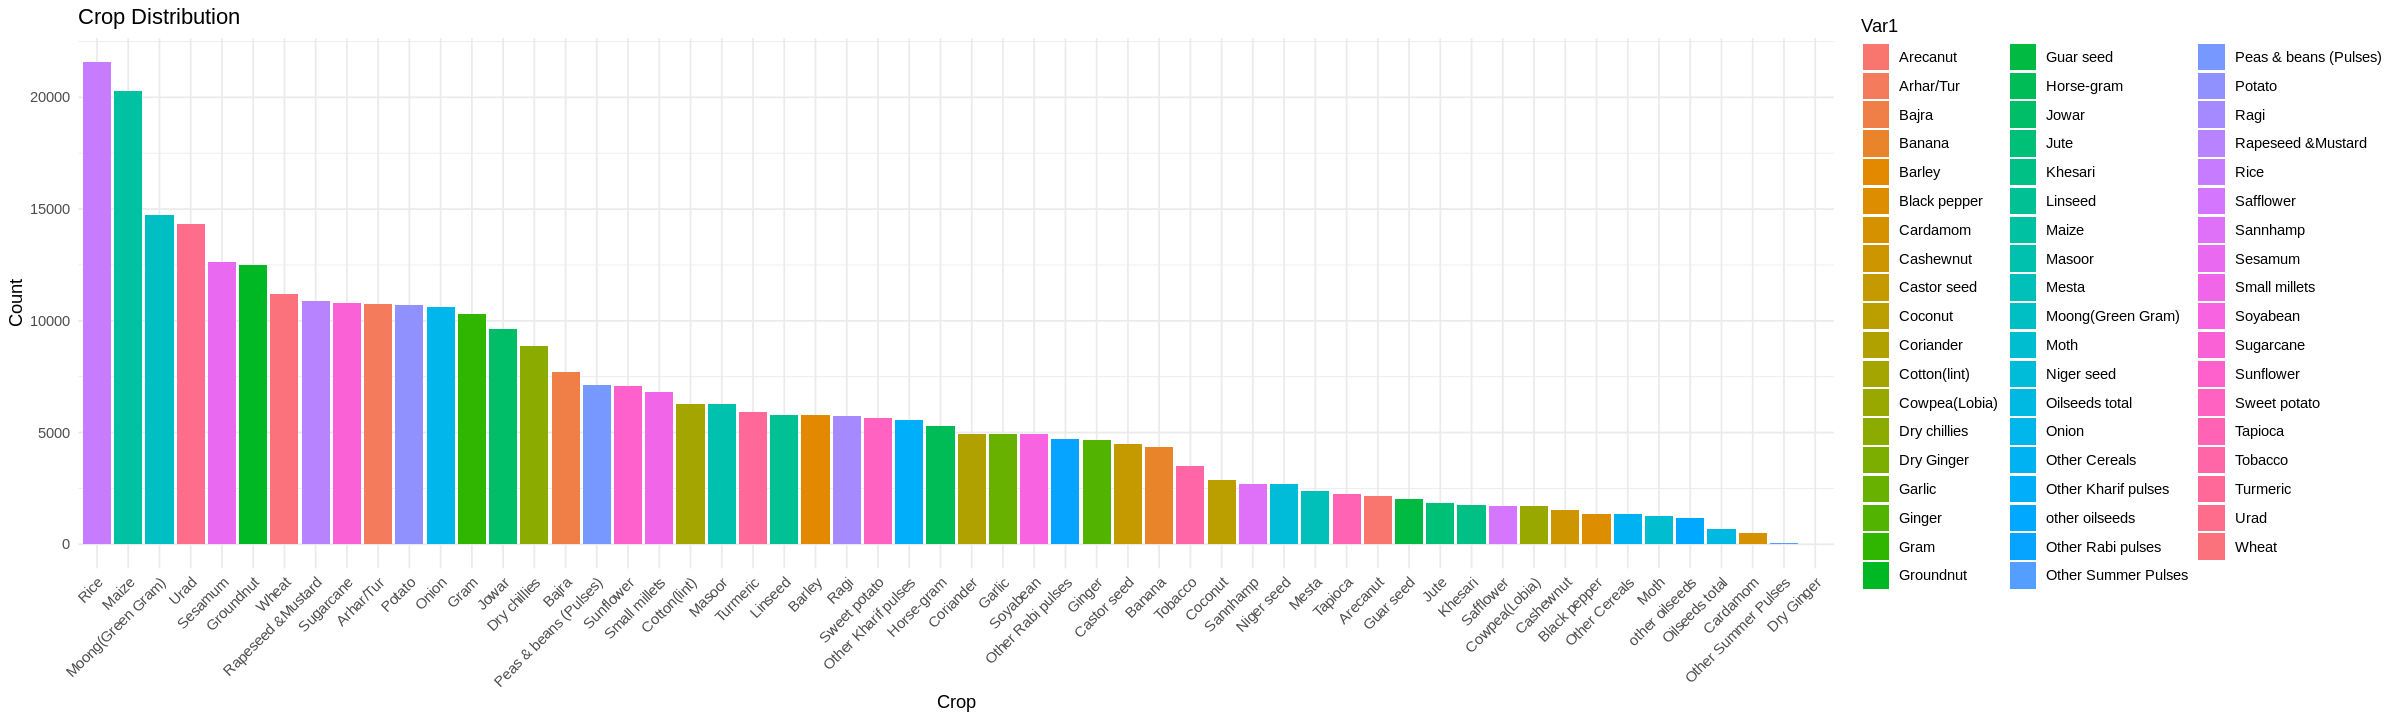

In [ ]:
# Visualization 2: Crop Distribution
options(repr.plot.width = 20, repr.plot.height = 6)

# Count crops by type and create a bar plot with a larger size
crop_counts <- data.frame(table(df_cleaned$Crop))
ggplot(crop_counts, aes(x = reorder(Var1, -Freq), y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  labs(title = "Crop Distribution",
       x = "Crop",
       y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

It shows that the counts of crops vary widely, with a minimum of 3 and a maximum of 21,567, and the average count is around 5,651.21. The standard deviation indicates the degree of variability in the counts.

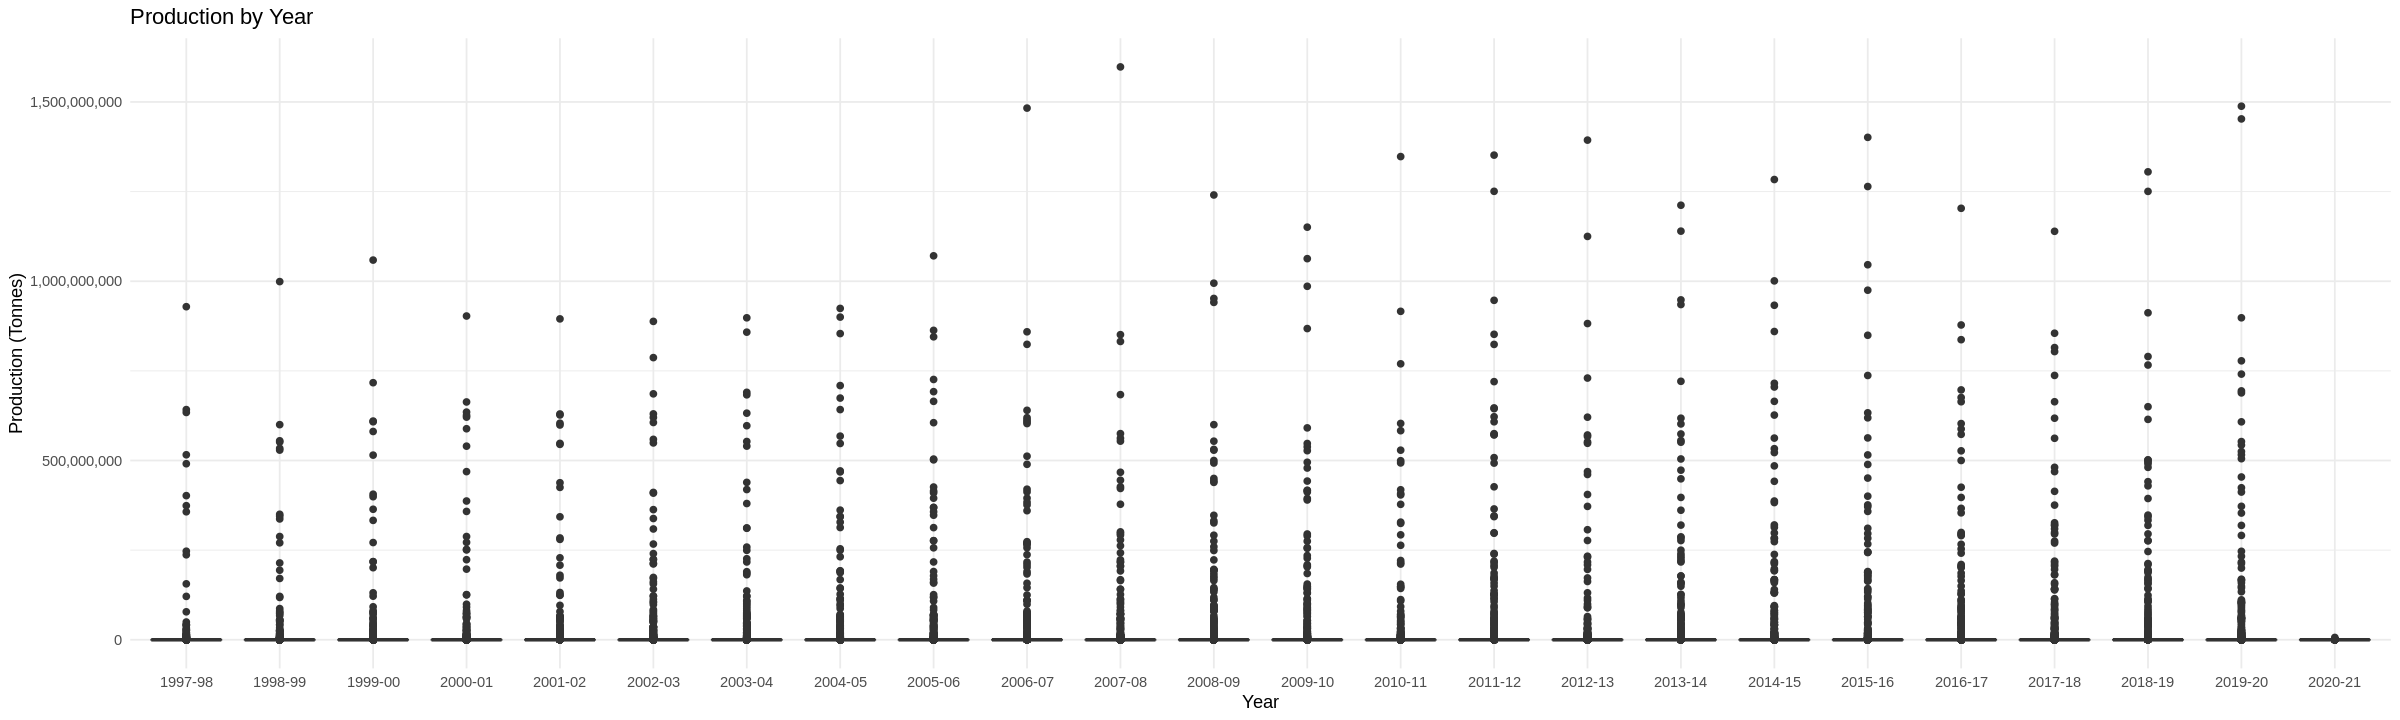

In [ ]:
# Visualization 3: Production by Year
ggplot(df_cleaned, aes(x = Year, y = Production)) +
  geom_boxplot(fill = "red") +
  labs(title = "Production by Year",
       x = "Year",
       y = "Production (Tonnes)") +
  theme_minimal() + scale_y_continuous(labels = comma)

The data contains potential outliers, including extremely high values such as 64,430,000 and 67,490,000 tonnes.

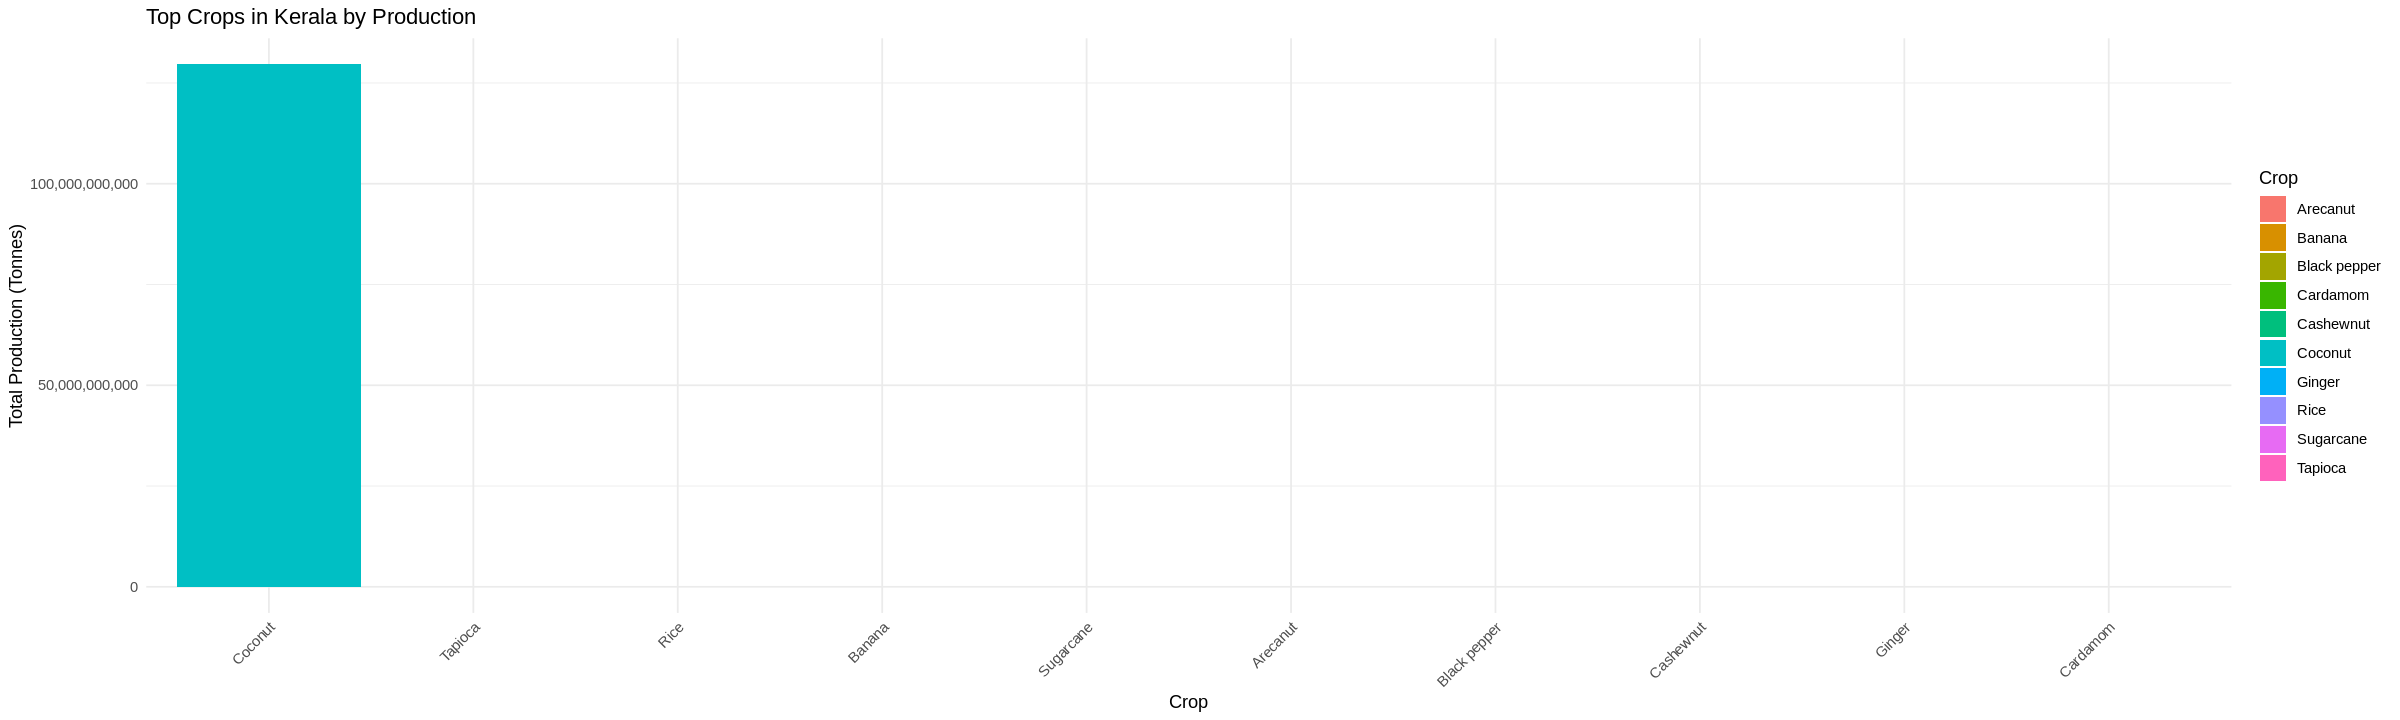

In [ ]:
# Visualization 4: Top Crops in Kerala by Production
kerala_data <- df_cleaned[df_cleaned$State == "Kerala", ]

# Group by Crop and calculate total production
kerala_crop_production <- aggregate(Production ~ Crop, data = kerala_data, sum)

# Sort the data by Total_Production in descending order
kerala_crop_production <- kerala_crop_production[order(-kerala_crop_production$Production), ]

# Create a bar plot for the top crops in Kerala
ggplot(head(kerala_crop_production, 10), aes(x = reorder(Crop, -Production), y = Production, fill = Crop)) +
  geom_bar(stat = "identity") +
  labs(title = "Top Crops in Kerala by Production",
       x = "Crop",
       y = "Total Production (Tonnes)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_y_continuous(labels = comma)

The "Coconut" fruit is the most popular crop in Kerala, with a value of 12 million. It means it's worthwhile to invest in coconut.

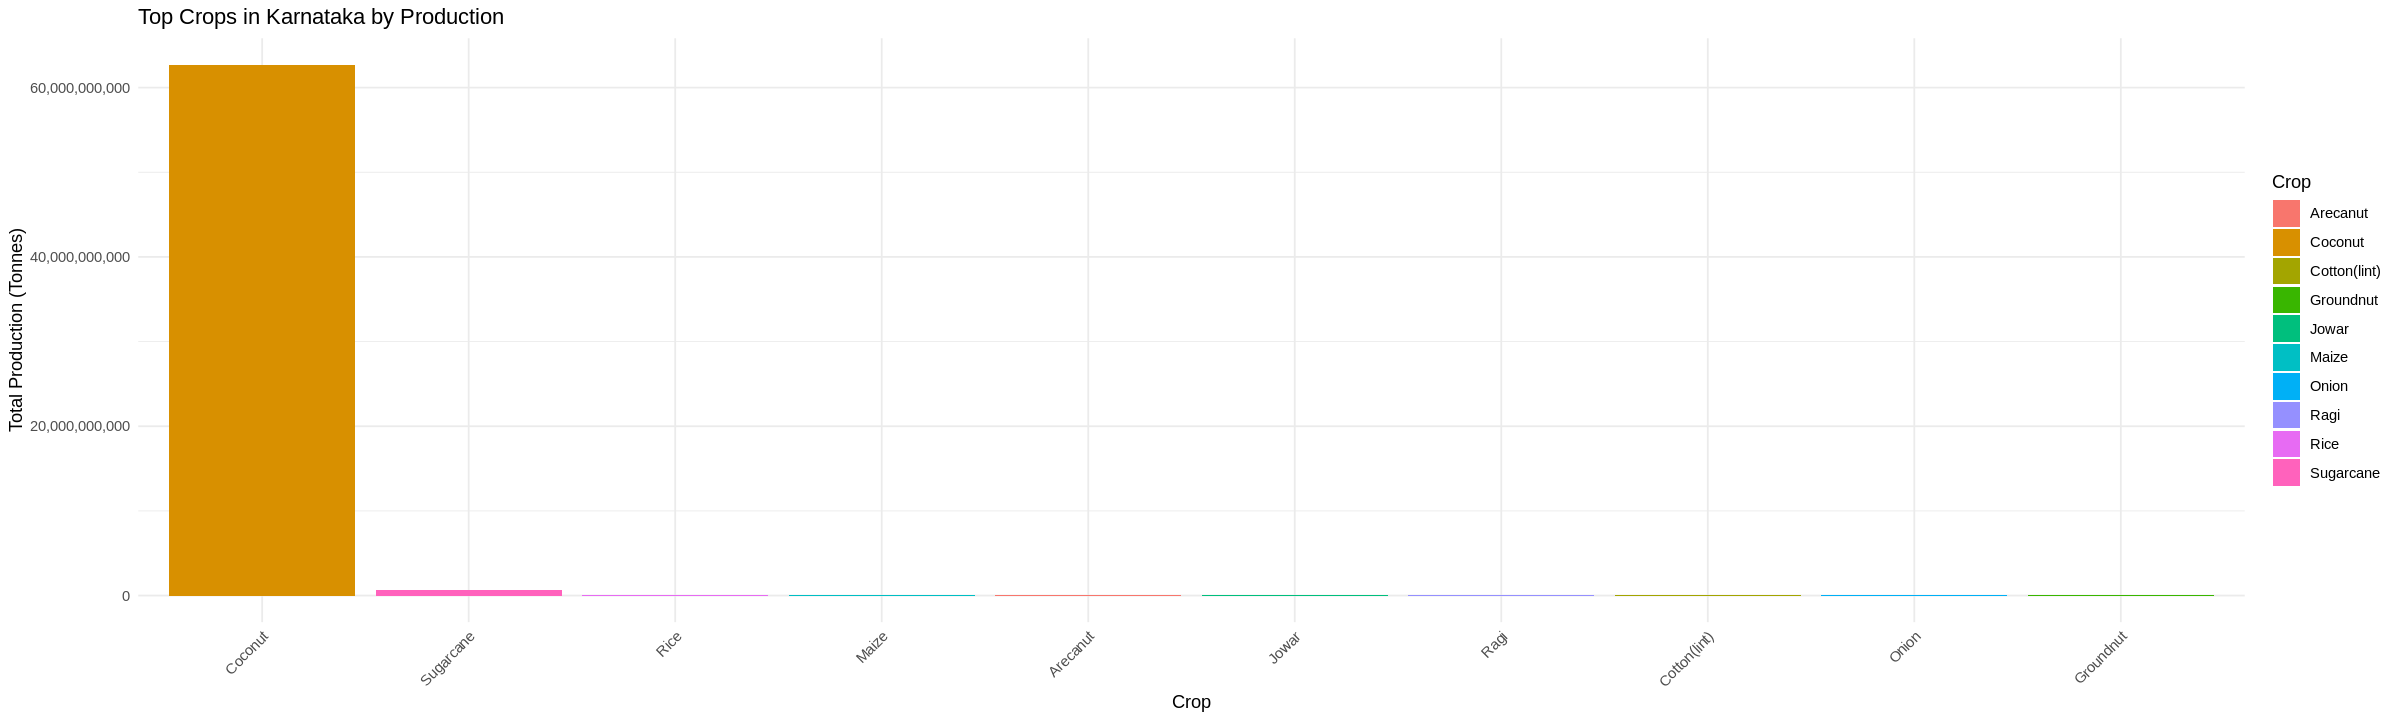

In [ ]:
# Visualization 4: Top Crops in Karnataka by Production
karnataka_data <- df_cleaned[df_cleaned$State == "Karnataka", ]

# Group by Crop and calculate total production
karnataka_crop_production <- aggregate(Production ~ Crop, data = karnataka_data, sum)

# Sort the data by Total_Production in descending order
karnataka_crop_production <- karnataka_crop_production[order(-karnataka_crop_production$Production), ]

# Create a bar plot for the top crops in Kerala
ggplot(head(karnataka_crop_production, 10), aes(x = reorder(Crop, -Production), y = Production, fill = Crop)) +
  geom_bar(stat = "identity") +
  labs(title = "Top Crops in Karnataka by Production",
       x = "Crop",
       y = "Total Production (Tonnes)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_y_continuous(labels = comma)

With a production of 62,692,166,000 tonnes, coconut outperforms all other crops in the dataset, while groundnut has the lowest production at 13,305,874 tonnes.

# Correlations

corrplot 0.92 loaded



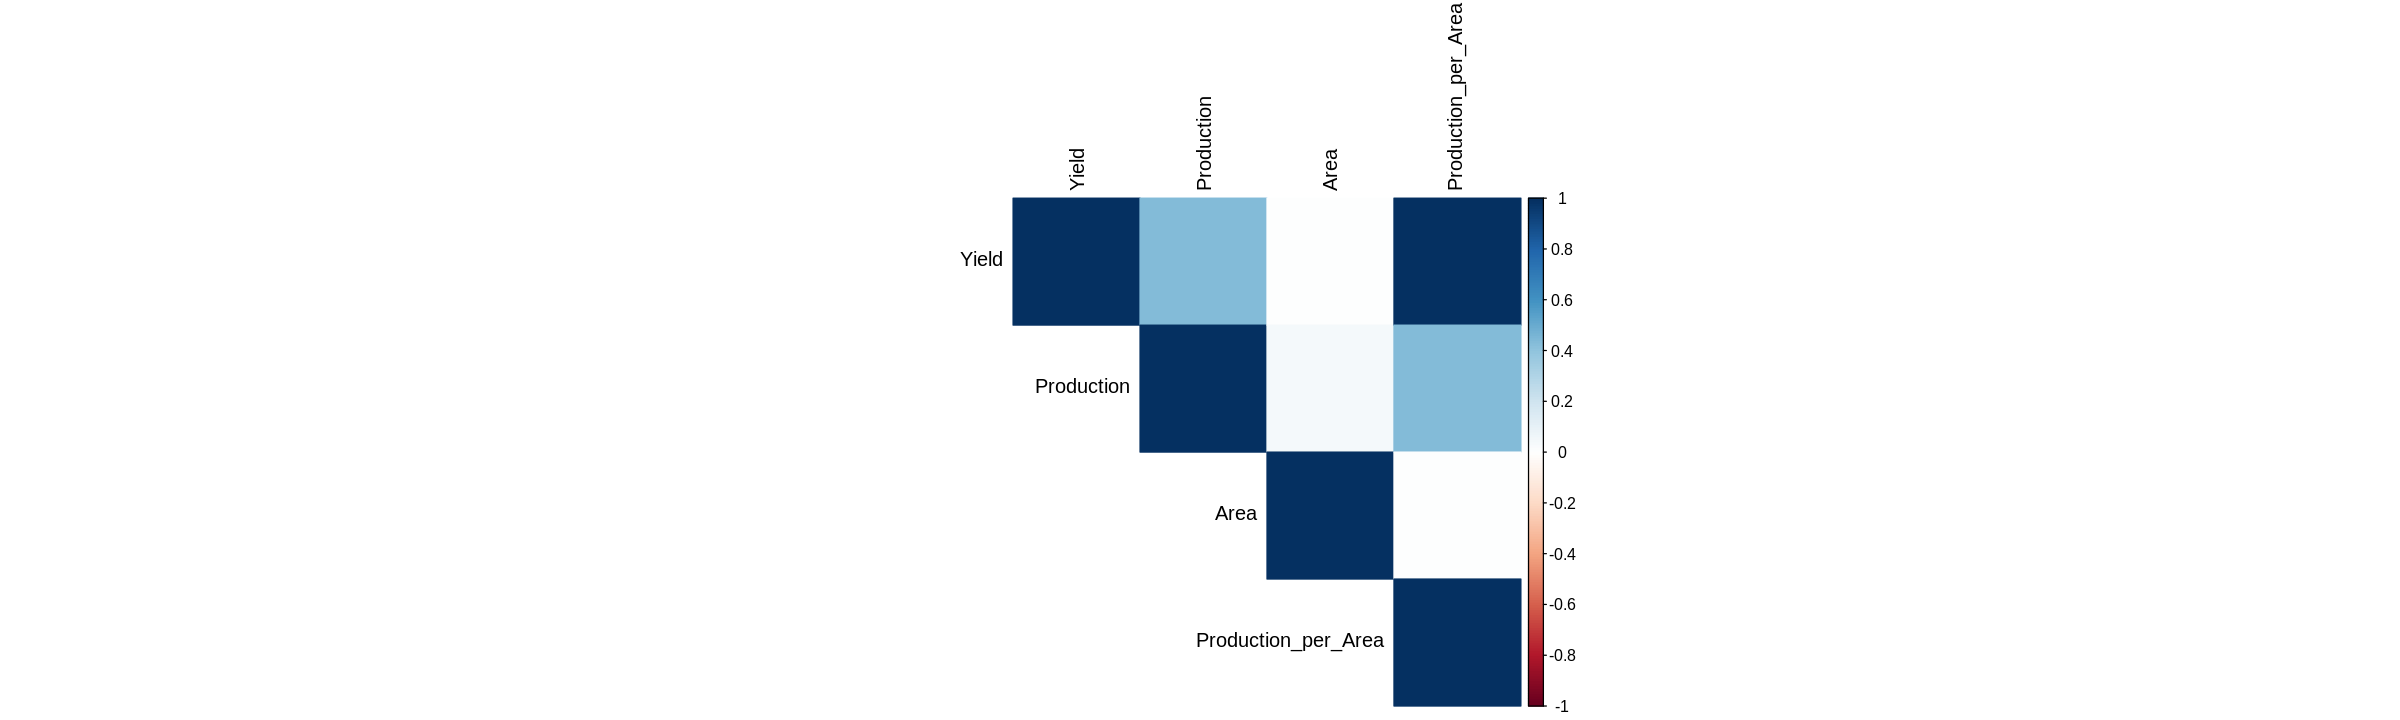

In [ ]:
# Correlation matrix
correlation_matrix <- cor(df_cleaned[, c("Yield", "Production", "Area", "Production_per_Area")])

# Visualization: Correlation Heatmap
library(corrplot)
corrplot(correlation_matrix, method = "color", type = "upper", tl.col = "black")

There is a moderate positive correlation (0.437) between Yield (crop output) and Production (total output), suggesting that as crop yield increases, total production tends to increase as well.

# Response Variable

The response variable in this dataset is **"Yield."** It is a numerical continuous variable that represents the yield of a specific crop in tonnes per hectare (or another unit of area) for a particular combination of state, district, crop, year, and season. In agricultural terms, yield refers to the amount of the crop produced per unit of land area and is an essential metric for assessing agricultural productivity.

**Why Yield as the Response Variable?** Yield is a critical indicator of the efficiency and success of agricultural practices. It measures how effectively farmers are able to convert their land into productive output, and it can be used to analyze trends in crop production over time and across different regions. Yield is often used to assess the impact of various factors, such as weather conditions, farming techniques, and crop varieties, on crop production.

**Expectations:** By selecting "Yield" as the response variable, you may expect to find the following insights or trends:

**Spatial Variations:** You can analyze how yields vary across different states and districts, identifying regions with higher or lower agricultural productivity.

**Temporal Trends:** You can examine whether crop yields have increased, decreased, or remained stable over the years, which can provide insights into the impact of changing agricultural practices and climate conditions.

**Seasonal Variations:** The dataset includes information on different seasons (e.g., Kharif, Rabi). You can explore how yields differ between these seasons and whether there are seasonal trends.

**Crop-specific Analysis:** You can compare the yields of different crops and assess which crops have higher or lower yields on average.

# Simple Linear Regression

In [ ]:
# Model 1: Predicting Arecanut Production based on Area
model_1 <- lm(Production ~ Yield, data = subset(df_cleaned, Crop == "Dry Ginger"))
summary(model_1)


Call:
lm(formula = Production ~ Yield, data = subset(df_cleaned, Crop == 
    "Dry Ginger"))

Residuals:
      1       2       3 
  4.628 -43.853  39.224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    15.95     409.23   0.039    0.975
Yield         202.64      50.64   4.001    0.156

Residual standard error: 59.02 on 1 degrees of freedom
Multiple R-squared:  0.9412,	Adjusted R-squared:  0.8824 
F-statistic: 16.01 on 1 and 1 DF,  p-value: 0.1559


Yield appears to be a strong predictor of "Production" for "Dry Ginger" crops, explaining a significant portion of the variability in production levels.

In [ ]:
# Model 2: Predicting Wheat Yield based on Area
model_2 <- lm(Yield ~ Area, data = subset(df_cleaned, Crop == "Wheat"))
summary(model_2)


Call:
lm(formula = Yield ~ Area, data = subset(df_cleaned, Crop == 
    "Wheat"))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8800 -0.6067 -0.1298  0.5377  4.6726 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.650e+00  1.109e-02  148.76   <2e-16 ***
Area        9.730e-06  1.215e-07   80.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8943 on 11214 degrees of freedom
Multiple R-squared:  0.364,	Adjusted R-squared:  0.364 
F-statistic:  6418 on 1 and 11214 DF,  p-value: < 2.2e-16


This linear regression model indicates that, in the context of business or agricultural analysis, the size of the cultivation area has a meaningful impact on the yield of wheat.

In [ ]:
# Model 3: Predicting Ragi Yield based on Avg Yield per Hectare
model_3 <- lm(Yield ~ Avg_Yield_per_Hectare, data = subset(df_cleaned, Crop == "Ragi"))
summary(model_3)


Call:
lm(formula = Yield ~ Avg_Yield_per_Hectare, data = subset(df_cleaned, 
    Crop == "Ragi"))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6492 -0.4305 -0.1042  0.3808  7.7003 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.102e+00  1.066e-02  103.36   <2e-16 ***
Avg_Yield_per_Hectare 8.370e-04  2.154e-05   38.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.731 on 5718 degrees of freedom
Multiple R-squared:  0.2089,	Adjusted R-squared:  0.2088 
F-statistic:  1510 on 1 and 5718 DF,  p-value: < 2.2e-16


The analysis indicates that there is a weak correlation, between the average yield per hectare and the overall Ragi crop yield. This implies that although the average yield per hectare plays a role there are probably factors that have an impact. To develop a model, for Ragi crop production, further research and inclusion of additional variables are necessary.

In [ ]:
# Model 4: Predicting Black pepper Total Production Tonnes based on Yield
model_4 <- lm(Total_Production_Tonnes ~ Yield, data = subset(df_cleaned, Crop == "Black pepper"))
summary(model_4)


Call:
lm(formula = Total_Production_Tonnes ~ Yield, data = subset(df_cleaned, 
    Crop == "Black pepper"))

Residuals:
       Min         1Q     Median         3Q        Max 
-3.751e+09 -1.797e+09  5.960e+08  1.889e+09  6.654e+09 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.833e+09  8.559e+07   44.78   <2e-16 ***
Yield       -1.177e+09  6.014e+07  -19.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.16e+09 on 1365 degrees of freedom
Multiple R-squared:  0.219,	Adjusted R-squared:  0.2184 
F-statistic: 382.8 on 1 and 1365 DF,  p-value: < 2.2e-16


From a business perspective, this analysis implies that Yield has a meaningful impact on the total production of black pepper.

In [ ]:
# Model 5: Predicting Cashewnut Total Area Hectares based on Avg Yield per Hectare
model_5 <- lm(Total_Area_Hectares ~ Avg_Yield_per_Hectare, data = subset(df_cleaned, Crop == "Cashewnut"))
summary(model_5)


Call:
lm(formula = Total_Area_Hectares ~ Avg_Yield_per_Hectare, data = subset(df_cleaned, 
    Crop == "Cashewnut"))

Residuals:
     Min       1Q   Median       3Q      Max 
-8090456 -1324843  -460448  3223414  5051096 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           8281205.02  111734.82   74.11   <2e-16 ***
Avg_Yield_per_Hectare   -2021.54      60.48  -33.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3206000 on 1514 degrees of freedom
Multiple R-squared:  0.4246,	Adjusted R-squared:  0.4242 
F-statistic:  1117 on 1 and 1514 DF,  p-value: < 2.2e-16


In [ ]:
# Model 6: Predicting Coconut Total Area Hectares based on Avg Yield per Hectare
model_6 <- lm(Avg_Yield_per_Hectare ~ Production, data = subset(df_cleaned, Crop == "Coconut"))
summary(model_6)


Call:
lm(formula = Avg_Yield_per_Hectare ~ Production, data = subset(df_cleaned, 
    Crop == "Coconut"))

Residuals:
    Min      1Q  Median      3Q     Max 
-4103.4  -408.6  -350.2   213.1  3962.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.290e+02  2.046e+01   20.97   <2e-16 ***
Production  2.816e-06  8.748e-08   32.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 976.6 on 2888 degrees of freedom
Multiple R-squared:  0.264,	Adjusted R-squared:  0.2637 
F-statistic:  1036 on 1 and 2888 DF,  p-value: < 2.2e-16


There is a statistically significant relationship between the average yield per hectare and the total area in hectares for the cashewnut cultivation. The R squared value of 42.46% suggest that there are factors, beyond the yield that impact the total area dedicated to cashewnut cultivation. It is beneficial for businesses to explore these factors for gaining an understanding of how land allocation decisions are made for cashewnut farming.

# Multiple Linear Regression

In [ ]:
# Multiple Linear Regression 1: Yield ~ Production + Area
multi_model1 <- lm(Yield ~ Production + Area, data = df_cleaned)
summary(multi_model1)


Call:
lm(formula = Yield ~ Production + Area, data = df_cleaned)

Residuals:
   Min     1Q Median     3Q    Max 
-19062    -67    -66    -60  43831 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.777e+01  1.474e+00   45.98   <2e-16 ***
Production   1.880e-05  6.625e-08  283.77   <2e-16 ***
Area        -4.242e-04  3.093e-05  -13.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 831.2 on 339387 degrees of freedom
Multiple R-squared:  0.1918,	Adjusted R-squared:  0.1918 
F-statistic: 4.026e+04 on 2 and 339387 DF,  p-value: < 2.2e-16


In [ ]:
# Multiple Linear Regression 2: Yield ~ Production + Area + Other_Variable
multi_model2 <- lm(Yield ~ Production + Area + Yield_per_Hectare, data = df_cleaned)
summary(multi_model2)


Call:
lm(formula = Yield ~ Production + Area + Yield_per_Hectare, data = df_cleaned)

Residuals:
   Min     1Q Median     3Q    Max 
-19878    -65    -64    -58  42690 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.580e+01  1.456e+00   45.18   <2e-16 ***
Production         1.880e-05  6.546e-08  287.19   <2e-16 ***
Area              -4.140e-04  3.056e-05  -13.55   <2e-16 ***
Yield_per_Hectare  1.873e+00  2.061e-02   90.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 821.3 on 339386 degrees of freedom
Multiple R-squared:  0.211,	Adjusted R-squared:  0.211 
F-statistic: 3.025e+04 on 3 and 339386 DF,  p-value: < 2.2e-16


Considering these factors, Model 2 appears to be slightly better than Model 1 based on the higher R-squared and adjusted R-squared values, indicating that it explains a bit more of the variability in the data. However, it's important to keep in mind that the choice between these two models may also depend on the specific context and goals of your analysis, as well as domain knowledge.

## Model Comparison

In [ ]:
# Simple Linear Regression: Yield ~ Production + Area
model_simple <- lm(Total_Area_Hectares ~ Avg_Yield_per_Hectare, data = subset(df_cleaned, Crop == "Cashewnut"))

# Multiple Linear Regression: Yield ~ Production + Area + Yield_per_Hectare
model_multiple <- lm(Yield ~ Production + Area + Yield_per_Hectare, data = df_cleaned)

In [ ]:
# Evaluate the Simple Linear Regression Model
predicted_simple <- predict(model_simple, newdata = df_cleaned)
mae_simple <- mean(abs(df_cleaned$Yield - predicted_simple))
mse_simple <- mean((df_cleaned$Yield - predicted_simple)^2)
rmse_simple <- sqrt(mse_simple)
rsquared_simple <- summary(model_simple)$r.squared

# Evaluate the Multiple Linear Regression Model
predicted_multiple <- predict(model_multiple, newdata = df_cleaned)
mae_multiple <- mean(abs(df_cleaned$Yield - predicted_multiple))
mse_multiple <- mean((df_cleaned$Yield - predicted_multiple)^2)
rmse_multiple <- sqrt(mse_multiple)
rsquared_multiple <- summary(model_multiple)$r.squared

# Create a DataFrame to compare results
comparison_df <- data.frame(
  Model = c("Simple Linear Regression", "Multiple Linear Regression"),
  MAE = c(mae_simple, mae_multiple),
  MSE = c(mse_simple, mse_multiple),
  RMSE = c(rmse_simple, rmse_multiple),
  R_squared = c(rsquared_simple, rsquared_multiple)
)

# Print the comparison results
print(comparison_df)

                       Model          MAE          MSE         RMSE R_squared
1   Simple Linear Regression 8007210.5086 6.505890e+13 8065910.0490 0.4246262
2 Multiple Linear Regression     122.8442 6.745578e+05     821.3147 0.2109576


We would recommend choosing Model 2 over the option because it has a level of predictive accuracy and a lower Residual Standard Error (RSE). Additionally Model 2 remains statistically significant with a adjusted R squared and F statistic. As a result it can offer forecasts and provide better insights that can aid in making informed decisions.

# Project Report

Dear Minister of Agriculture and Farmers Welfare in India,

We pleased to present to you a comprehensive analysis of the agricultural crop production data for India. This report aims to provide valuable insights into crop production trends, yield prediction, and key factors influencing agricultural productivity. Our analysis is based on data from the India Agriculture Crop Production dataset, spanning multiple years and regions.

### Summary of Findings:

**Seasonal Focus**: The 'Kharif' & 'Rabi' season is when the majority of crops are grown. To increase agricultural output, stakeholders should think about concentrating their efforts and investments on this season.

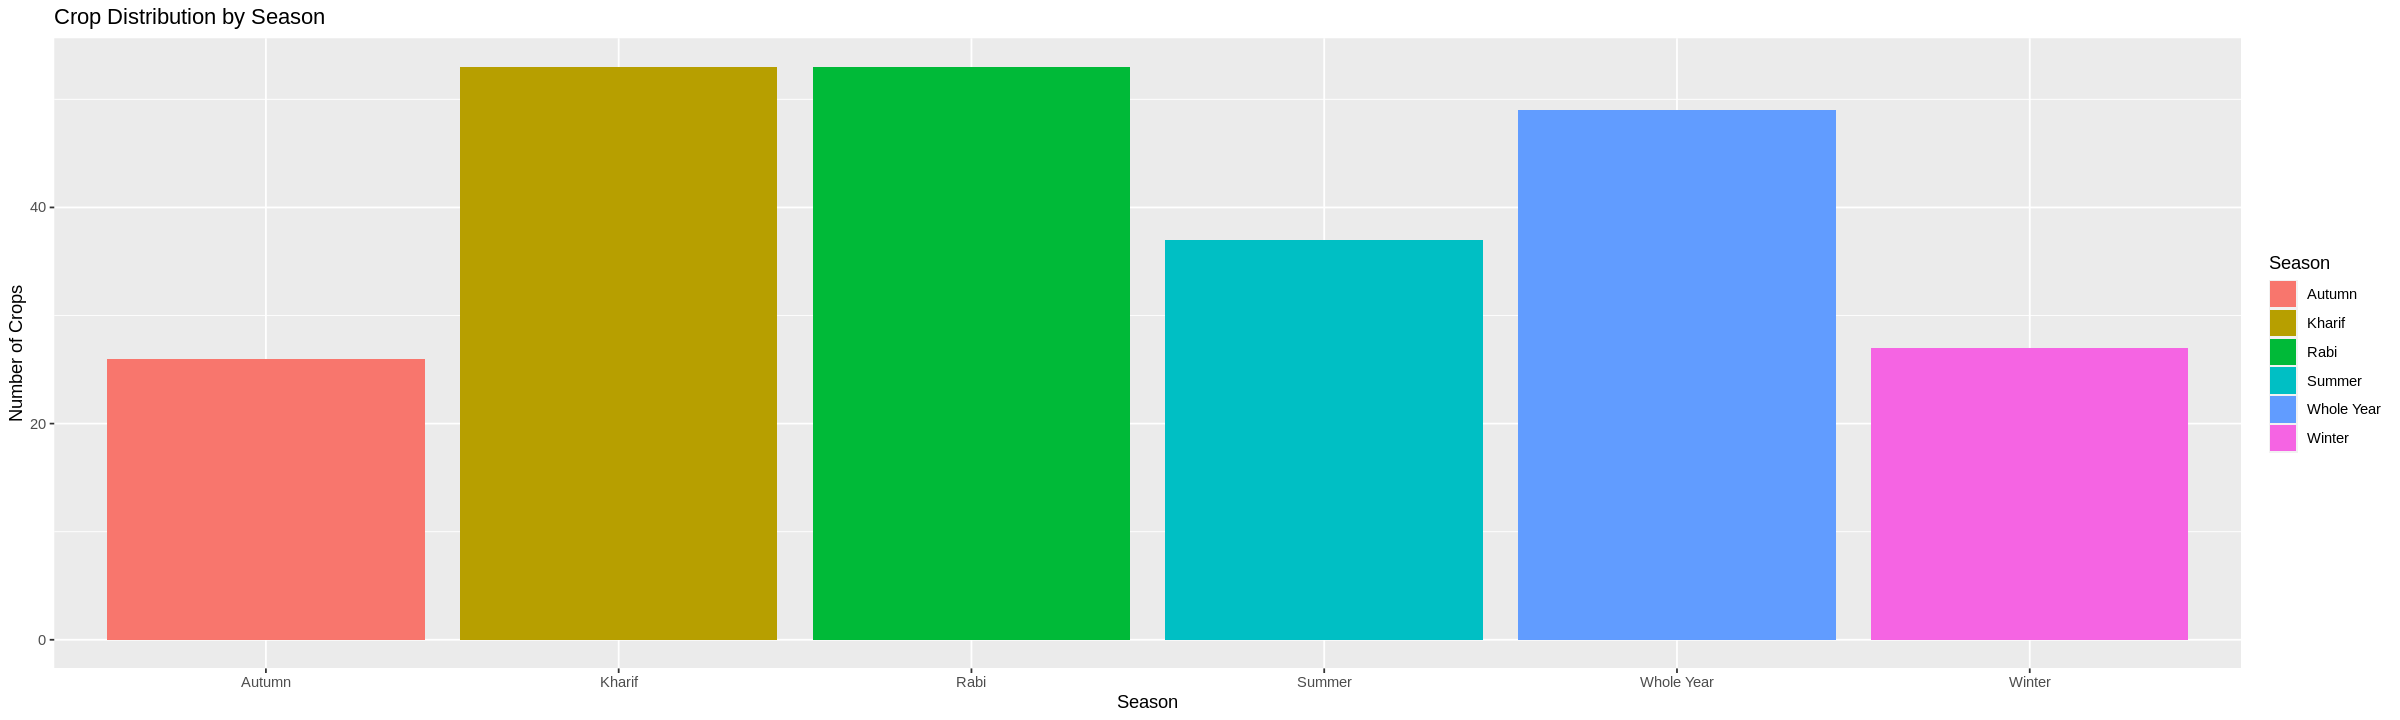

In [ ]:
# Count of crops by season
crop_season_counts <- df_cleaned %>%
  group_by(Season) %>%
  summarise(Crop_Count = n_distinct(Crop))

# Bar plot
ggplot(crop_season_counts, aes(x = Season, y = Crop_Count, fill = Season)) +
  geom_bar(stat = "identity") +
  labs(title = "Crop Distribution by Season",
       x = "Season",
       y = "Number of Crops",
       fill = "Season")

**Coconut Dominance**: With an astounding 310.8 billion units produced, coconuts take the top spot among all crops. This demonstrates how crucial coconut cultivation is to India's agricultural sector.

**Regional Influence:** The analysis emphasises the importance of India's southern area, with states like Tamil Nadu and Kerala making sizable contributions to the nation's total crop production. For stakeholders, understanding regional dynamics is essential.

**Production Peak:** In the year 2007-08, India experienced its highest agricultural production, reaching approximately 1.5 billion units. This year marked a significant milestone in the country's agricultural sector.



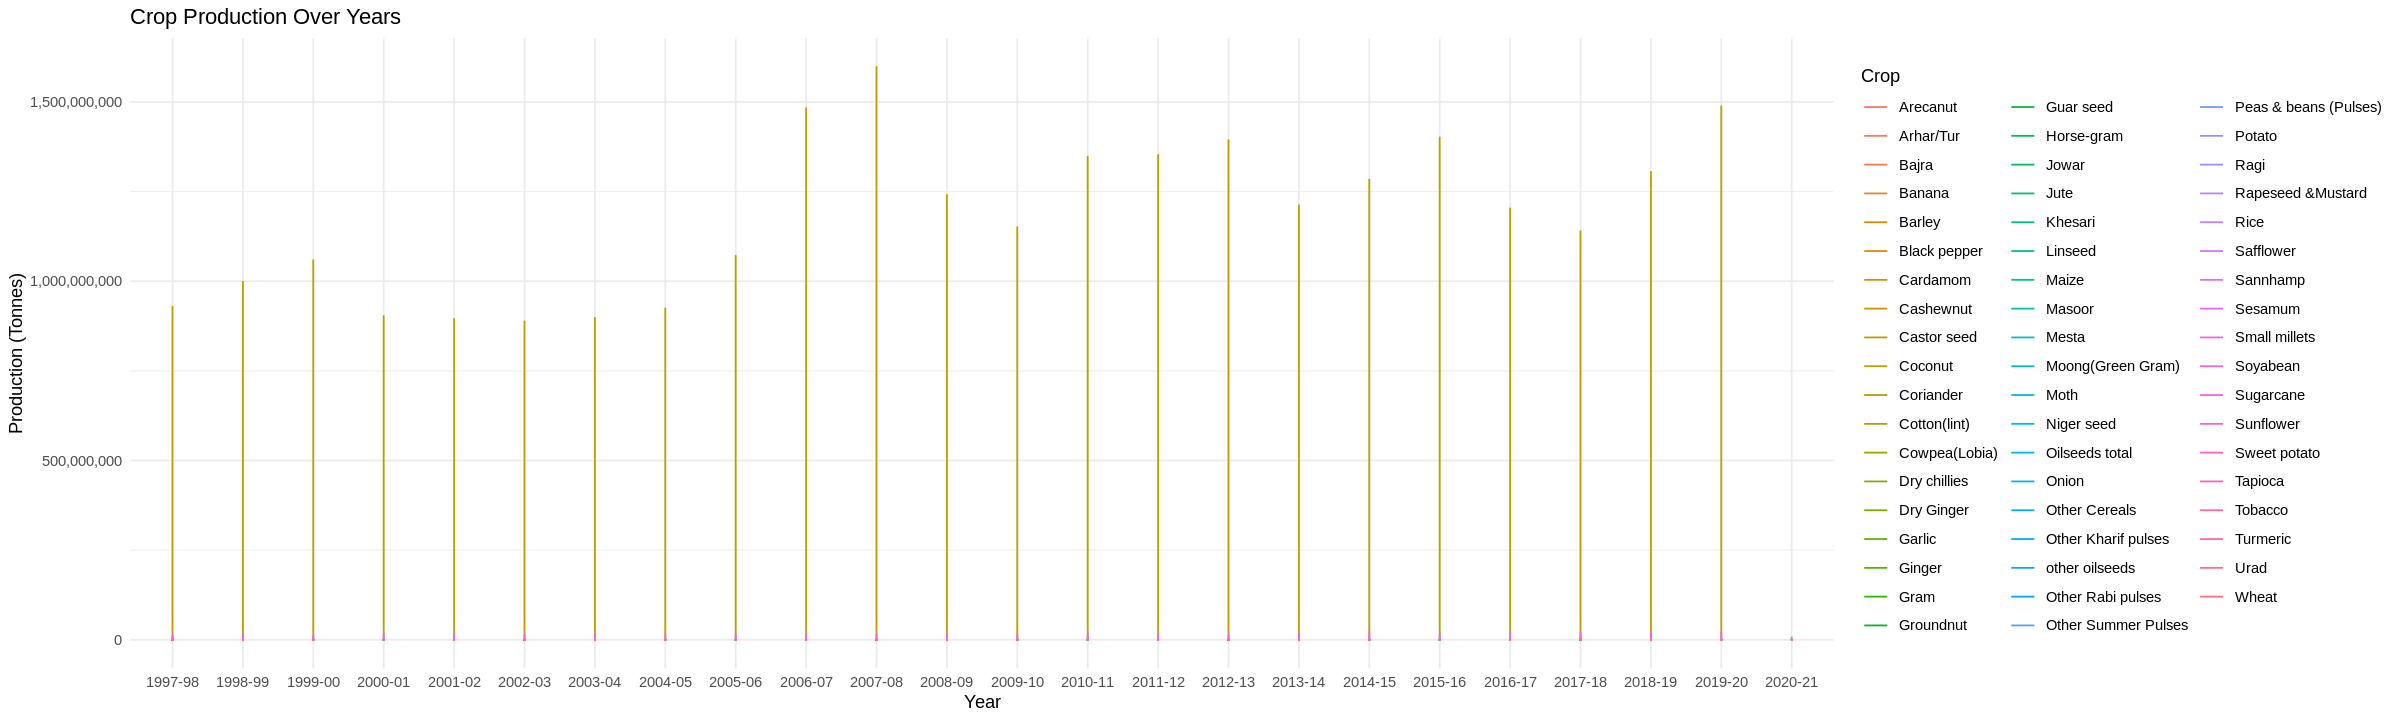

In [ ]:
# Time Series Line Plot (Crop Production Over Years)
ggplot(df_cleaned, aes(x = Year, y = Production, color = Crop)) +
  geom_line() +
  labs(title = "Crop Production Over Years",
       x = "Year",
       y = "Production (Tonnes)") +
  theme_minimal() +
  scale_y_continuous(labels = scales::comma)

**Fruits Category**: With a production value of 32 million, the "Fruits" category stands out as the most popular crop category. This implies a big investment opportunity in fruit farming.

**Response Variable:** "Yield," which represents crop yield in tonnes per hectare, is the response variable in the dataset. A key indicator of agricultural productivity and crop success is yield.

**Best Predictive Model:** The "Predicting Wheat Yield based on Area" (Model 2) model was found to be the best appropriate among the options examined. It showed statistically significant coefficients, a low residual standard error, a high R-squared value, and a high F-statistic.

### Recommendations:

**Fruit investment:** Given the widespread use of fruit production, stakeholders are urged to look into investment possibilities in this industry. Fruits continue to have a strong market demand, making this a profitable business.

**Area Strategies:** Take into account adjusting your plans to account for area differences. Due to its significant contribution, the southern region merits special consideration and possible cooperation with nearby farms.

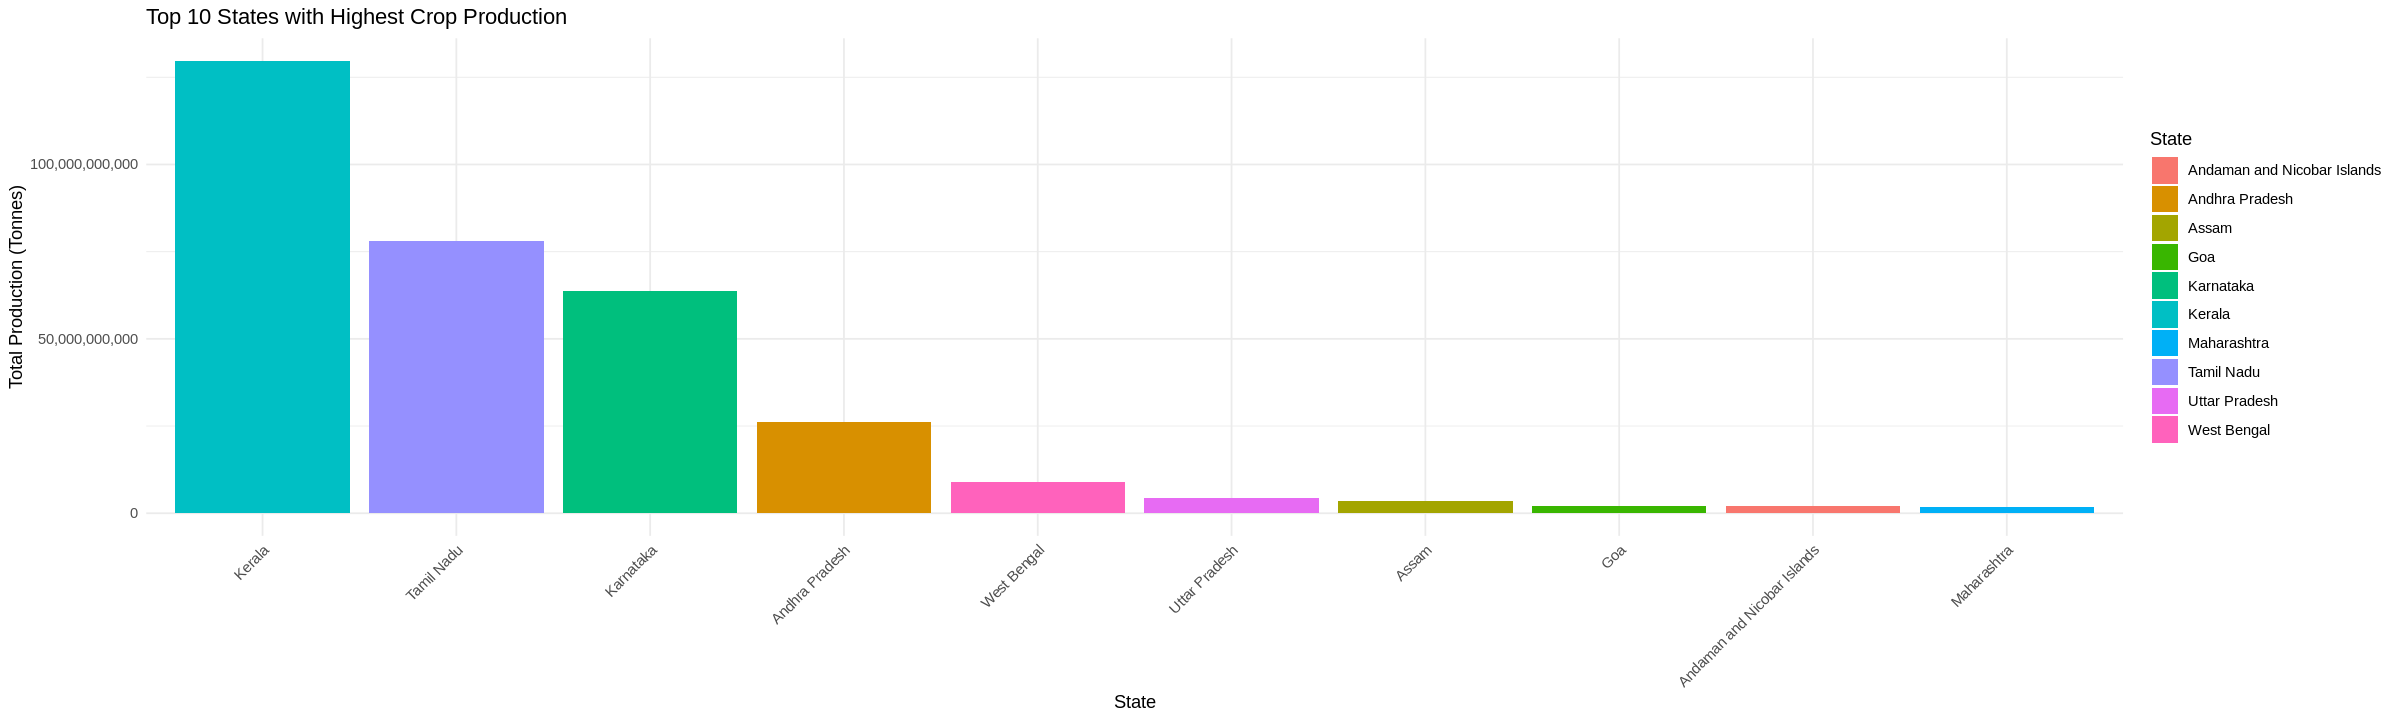

In [ ]:
# Calculate the total production by state
state_production <- aggregate(Production ~ State, data = df_cleaned, sum)

# Order the state_production dataframe by production in descending order
state_production <- state_production[order(-state_production$Production), ]

# Select the top 10 states with the highest production
top_10_states <- head(state_production, 10)

# Create a bar plot for the top 10 states with formatted y-axis labels
ggplot(top_10_states, aes(x = reorder(State, -Production), y = Production, fill = State)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 10 States with Highest Crop Production",
       x = "State",
       y = "Total Production (Tonnes)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = scales::comma)  # Format y-axis labels with commas

**Crop Diversification:** Coconut is the most popular crop, however diversifying crop portfolios might reduce risks brought on by relying too heavily on a single crop. It is important to investigate crop diversity and rotation options.

**Seasonal Planning:** Time agricultural investments and operations to coincide with the "Kharif" season, when crop cultivation is at its peak. Planning ahead and allocating resources efficiently helps maximise yield.

**Continuous Monitoring:** Use data-driven decision-making processes and routine monitoring to adjust to shifting market dynamics and agricultural trends.

In conclusion, this analysis offers important insights into the performance and possibilities of the Indian agriculture sector. We advise all parties involved to take into account the conclusions and suggestions presented in this research before making any decisions that will affect the agriculture sector's production and profitability.